In [1]:
import torch
from torch.utils.data import DataLoader
import numpy as np

import os
import imageio

import matplotlib.pyplot as plt

from dataset import get_rays

/home/micka/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The data is stored in fox/fox.

There are train and test images
There are instrisics of the form
fx
0
cx
0
0
fy
cy
0
0
0
1
0
0
0
0
1
Which is a 4x4 matrix like representation of intrinsics (more info here: https://ksimek.github.io/2013/08/13/intrinsic/)

The cx, cy are the center of the image.
fx and fy are focal length in x and y directions


# Camera/Dataset

In [3]:
batch_size=1000
o,d, target_px_values=get_rays("../fox/fox")

dataloader=DataLoader(torch.cat((torch.from_numpy(o),torch.from_numpy(d),torch.from_numpy(target_px_values)), dim=1), batch_size=batch_size, shuffle=True)

test_o, test_d, test_target_px_values=get_rays("../fox/fox", "test")

(90, 400, 400, 4)
(10, 400, 400, 4)


In [4]:
test_o.shape

(10, 160000, 3)

[0. 0. 0. 0.]


/tmp/ipykernel_18868/1685041013.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("../fox/fox/imgs/" + img_file_names[0]) /255.


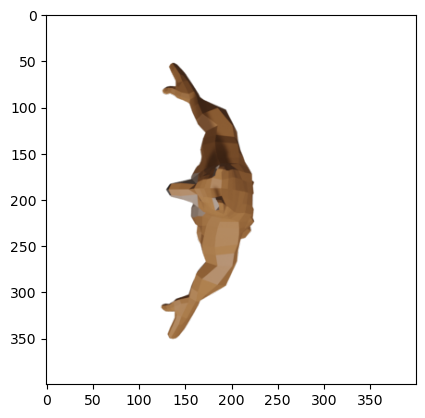

In [50]:
# extract an image from the dataset
img_file_names=[f for f in os.listdir("../fox/fox/imgs") if "train" in f]
img = imageio.imread("../fox/fox/imgs/" + img_file_names[0]) /255.

print(img[0,0,:])
#if img.shape[2]==4:
    #img=img[..., :3]*img[..., -1:] + (1.-img[..., -1:])
#    img=img[..., :3]*img[..., -1:]

# plot the image
plt.imshow(img)

# Rendering

# Model

# Training